# Lesson 8 & 9 Class Exercises: Seaborn and Supervised Machine Learning

## Background. 
For these class exercises, we will be using a wine quality dataset which was obtained from this URL:
http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality. We will be using the supervised machine learning tools from the homework lessons to determine a model that can use physicochemical measurements of wine as a predictor of quality.  The data for these exercises can be found in the `data` directory of this repository.

## Get Started
Import the Numpy, Pandas, Matplotlib (matplotlib magic), Seaborn and sklearn packages. 

In [2]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Exercise 1. Explore the data
First, read about this dataset from the file [../data/winequality.names](../data/winequality.names)

Next, read in the file named `winequality-red.csv`. This data, despite the `csv` suffix, is separated using a semicolon.

In [3]:
wine = pd.read_csv('../data/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


How many samples (observations) do we have?

In [4]:
wine.shape

(1599, 12)

Are the data types for the columns in the dataframe appropriate for the type of data in each column?

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Any missing values?

In [6]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exercise 2: Explore the Dependent data

The quality column contains our expected outcome. Because we want to predict this score, it is our dependent variable. Wines scored as 0 are considered very bad and wines scored as 10 are very excellent.  How many samples are there per each quality of wine?

In [7]:
wine.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


View the quality distribution using a histogram. Use the [hist](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html) function of a Series object to generate this plot.

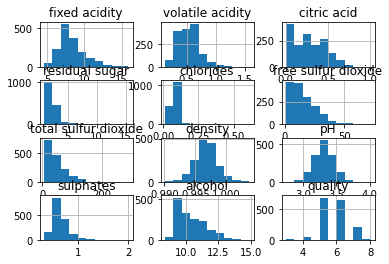

In [8]:
wine.hist()
plt.show;

Recreate the histogram using the Seaborn [displot](https://seaborn.pydata.org/generated/seaborn.distplot.html) function, but be sure to:
+ Set the range of the x-axis to show all possible quality values (e.g. 0-10) 
+ Make the widths of the bars span 3/4 the distance between whole numbers
+ Add add gridlines.
+ Set the x-axis label to read 'Quality Score'

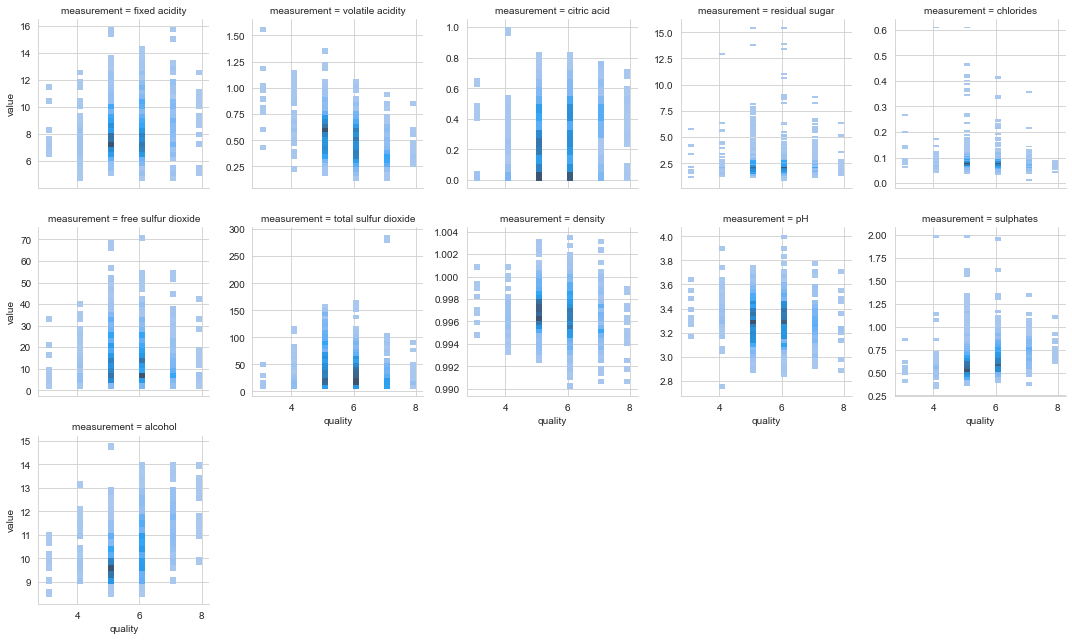

In [11]:
wine_tidy = pd.melt(wine, id_vars = 'quality', var_name = 'measurement')

sns.set_style('whitegrid')
g = sns.FacetGrid(wine_tidy, col = 'measurement', col_wrap = 5, sharey = False)

g.map(sns.histplot, 'quality', 'value');

## Exercise 3:  Explore the Independent Data

Describe the data for all of the columns in the dataframe. This includes our physicochemical measurements (independent data) as well as the quality data (dependent).

Visualizing the data can sometimes better help undrestand it's limits. Create a single figure, that contains boxplots for each of the data columns. Use the [plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) function that comes Pandas DataFrames to do this. Be sure to:

+ Each data column must be in it's own subplot
+ Because we have 12 data columns set the layout to have 2 rows of 6 boxplots.
+ Make sure each boxplots has it's own x and y axis labels (e.g. they do not share axis labels).
+ Because the figure is wide set it to be 12 x 8 inches so we can see detail.

Be sure to take note of columns with outliers as some supervised machine learning models can be biased when outliers are present.

Now, let's explore the distribution of data for each of these columns.  Similar to the `hist` function used with the `quality` column we did previously, the Pandas Dataframe has a similar [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function. Use this to generate the distribution of each column.  Set the figure size to be 12 x 12 inches.  Be sure to take note of the shape of the distributions as some supervised machine learning approaches expect specific distribution types.


Next, let's look for columns that might show correlation with other columns. Remember, colinear data can bias some supervised machine learning models, so for data columns that are highly correlated we should remove those. Use the Seaborn `pairplot` function to do this.  Be sure to color each point with the quality value. (Note, this may take awhile to create)

Perform correlation analysis on the data columns

Use the Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to create a heatmap of the correlation values between data columns. Be sure to:
+ set the figure dimensions to read the values.
+ show the correlation values in the cells of the heatmap

## Exercise 4:  Cleaning the data

In summary, what important observations we can make from the exploration of both the dependent and independent variables in the data?

What type of  cleaning decisions should be made?

Is the data Tidy?  Do we need to adjust it?

## Exercise 5: Use SML Classification Models 

First, separate out the outcome (dependent) variable and our observed (independent) data variables. Save these into variables named `X` and `Y`.

Normalize the observed data. Be sure to use the [normalization strategy](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) best suited for the observations about the data.

Generate the training set such that 20% of the data is left for testing and 80% for training.   Name the variables with the training data as `Xt` and `Yt` respectively. Name the data used for testing/validation as `Xv` and `Yv`

Create a k-fold cross-validation strategy object to be used by the model that will be used to split the training data into 10 equal parts.

Use the following array to store results:
```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10),
    'RandomForestClassifier': np.zeros(10)
}
```

Execute a Logistic Regression classifier model

Execute a Linear Discriminant Analysis classifier model

Execute a K Neighbors classifier model

Execute a Decision Tree classifier model

Execute a GaussianNB classifier model

Execute a Support Vector Machine (SVC) classifier model

Execute a Random Forest classifier model

Plot the results of each of the models. Which performed best?

## Exercise 6: Use the Model to Predict.

Create a new object of the classifier that performed best:

Create a new model using all of the training data.

Using the testing data, predict the wine quality.  Save the result in a new variable named `predictions`

Briefly, let's view the contents of the predictions array.

What is the overall accuracy of the predictions?

Create the confusion matrix and use the Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to explore how well the model worked. (Note, this may take awhile to create). For the heatmap, be sure to
+ Show the values of the confusion matrix in the cells of the heatmap
+ Set the x-axis and y-axis labels.

Finally, generate and print the classification report